<a href="https://colab.research.google.com/github/just-suraj-j/OSHA-Archives---Fatal-Incidents-Text-Mining/blob/main/OSHA_Archives_Fatal_Incidents_Text_Mining_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
import os
import pandas as pd
import matplotlib.pyplot as plt
import time
import numpy as np

plt.style.use(style='seaborn')
%matplotlib inline

In [ ]:
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> l
Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [

True

In [ ]:
os.chdir("/content/Data")

In [ ]:
df=pd.read_csv("FatalData.csv")

In [ ]:
df.head()

,Desc09,Desc10,Desc11,Desc12,Desc13,Desc14,Desc15,Desc16,Desc17
0,Victim was inside a building bundling material...,"Decedent was working inside a mobile home, mix...",Worker was backing a forklift up an incline. ...,Worker at a soda bottling company was found de...,Worker was electrocuted in concrete electrical...,Worker killed in vehicle collision.,Worker struck and killed by forklift.,NaN,NaN
1,Victim was on a scaffold doing repairs on an a...,Decedent was driving a log truck uphill to pic...,Worker was removing sheet metal air conditioni...,Rock climbing instructor died after falling fr...,Worker performing repairs on bridge killed whe...,Worker struck and killed by falling load when ...,Worker killed in fall from roof.,Worker clearing debris died after being stung ...,A worker died after being caught between two v...
2,"Victim was conducting roofing work, and fell t...",Employees were installing roof trusses 20 feet...,Worker was found unresponsive at the base of a...,Worker fell off a ladder.,Worker was struck and killed by a horse being ...,Worker killed when forklift tipped over.,Worker killed in vehicle collision.,Woker hospitalized after being injured by pay ...,Worker fatally injured in fall from roof.
3,Victim was climbing a ladder while servicing a...,Decedent was observed standing behind the part...,Worker (security guard) was struck by tractor ...,Worker towing an airplane crashed into a build...,Worker struck and killed by truck.,Worker fatally crushed between metal sections ...,Worker fatally crushed by machine arm used to ...,Worker fatally crushed by falling crane boom.,A worker died after falling from a 6 foot ladd...
4,Employees were throwing away old files. They h...,"Decedent fell 4-ft, 8-inches off a platform, s...",Worker was working underneath a house in the p...,"Worker, attempting to rescue a trapped motoris...",Worker cleaning sump hole fell in and drowned.,Worker killed in fall from bed of truck.,Worker fatally crushed by machinery.,Worker fatally crushed by equipment that fell ...,Worker struck and killed by log.


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df.fillna("0",inplace=True)

In [ ]:
df["text_len"]=df.Desc09.map(lambda x: len(x))

In [ ]:
def plot_features(feature):
  x=df[feature]
  plt.figure(1, figsize=(16,8))
  plt.subplot(1,1,1)
  _=plt.hist(x, alpha=.7,color='red',bins=10)
  _=plt.hist(x, alpha=.5,color='grey',bins=10)
  return _

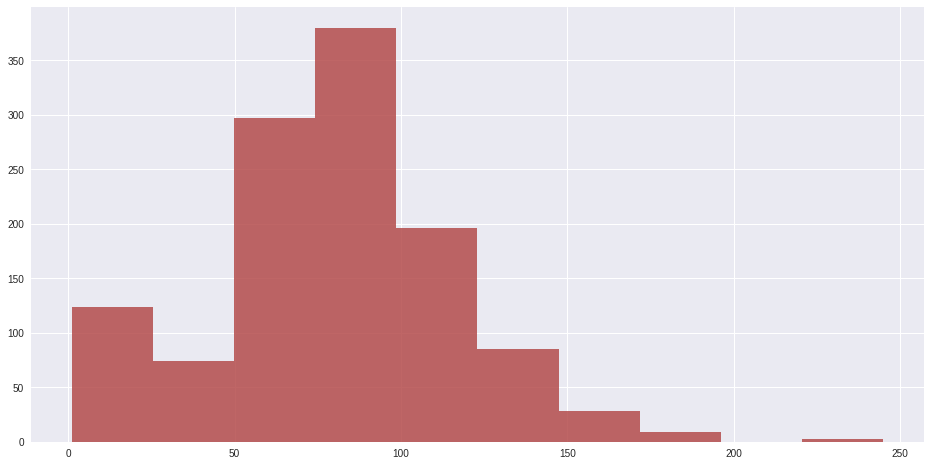

In [ ]:
_=plot_features("text_len")

In [ ]:
df["word_count"]=df.Desc12.str.split().map(lambda x: len(x))

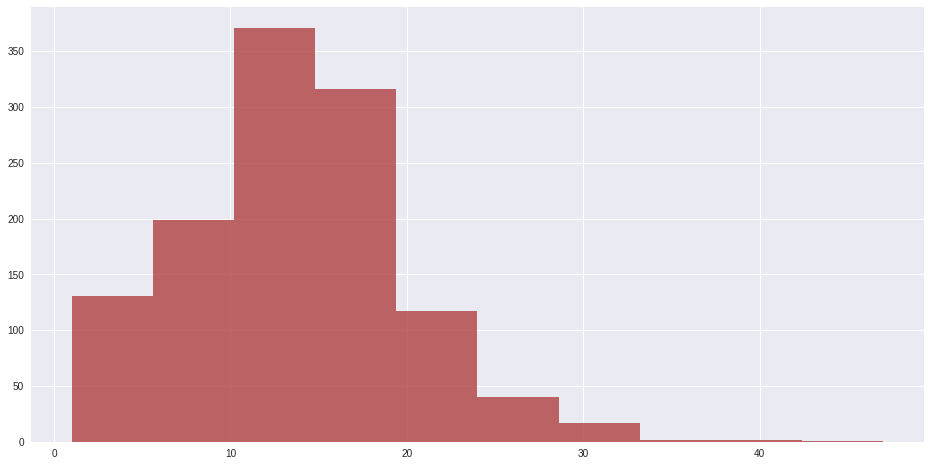

In [ ]:
_=plot_features("word_count")

In [ ]:
df["unique_word_count"]=df.Desc12.map(lambda x: len(set(str(x).split())))

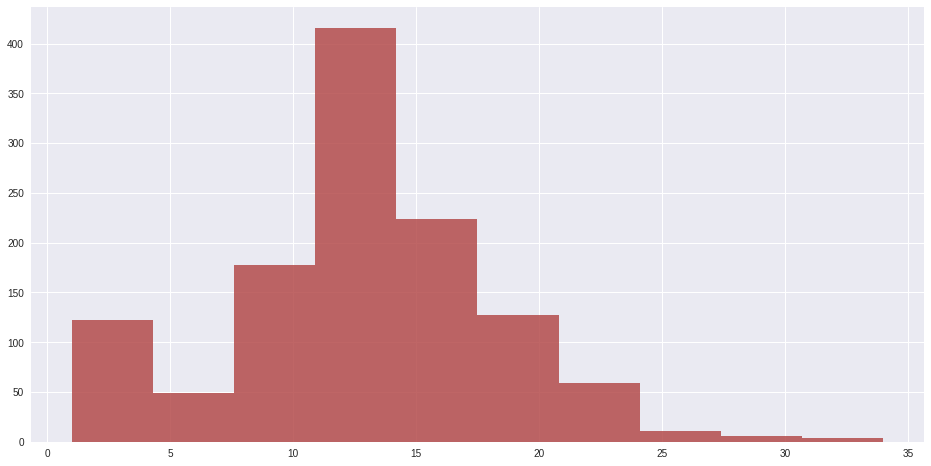

In [ ]:
_=plot_features("unique_word_count")

In [ ]:
df["mean_word_length"]=df.Desc12.map(lambda x: np.mean([len(w) for w in str(x).split()]) )

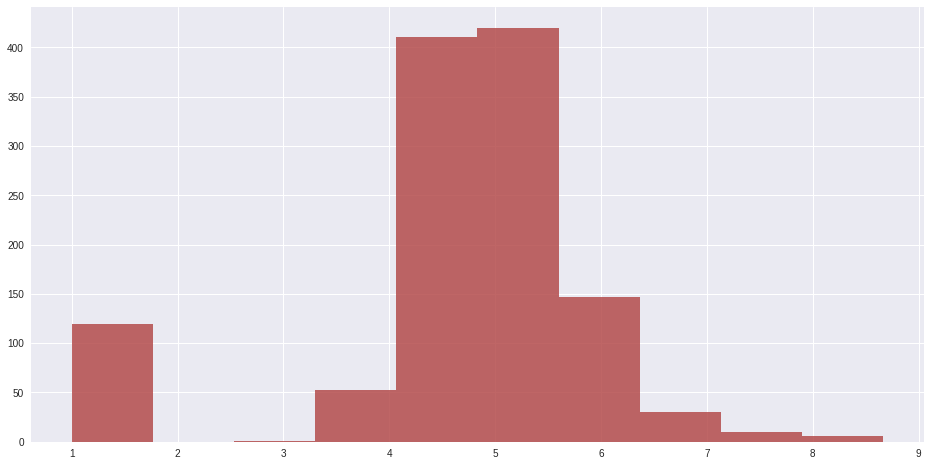

In [ ]:
_=plot_features("mean_word_length")

In [ ]:
import string

df["punctuation_count"]=df["Desc12"].map(
    lambda x: len([c for c in str(x) if c in string.punctuation])
)

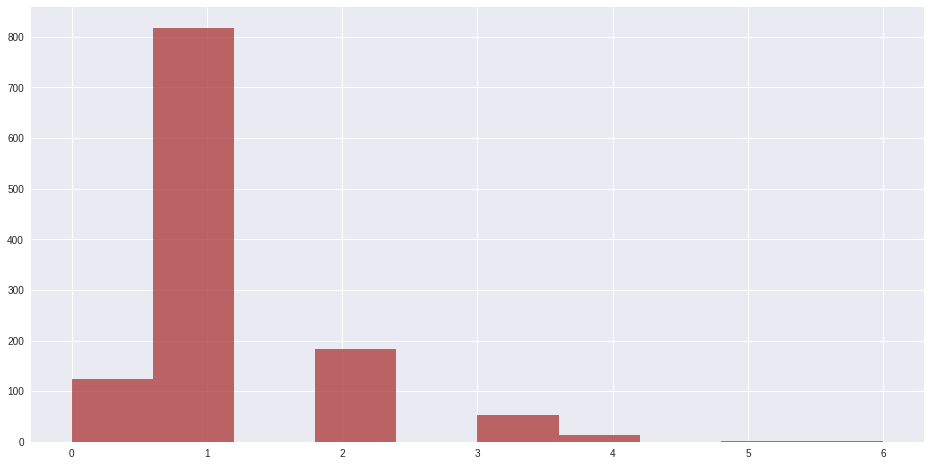

In [ ]:
_=plot_features("punctuation_count")

In [ ]:
from nltk.corpus import stopwords

In [ ]:
def generate_ngrams(text, n_gram=1, stop=True):
  stop=set(stopwords.words("english")) if stop else {}
  stop.add('0')
  stop.add('victim')
  stop.add('worker')
  stop.add('employee')
  stop.add('working')
  stop.add('0')
  stop.add('found')
  stop.add('work')
  stop.add('employees')
  stop.add('worker.')
  stop.add('fatal')
  stop.add('causing')
  stop.add('him.')
  stop.add('fatality')
  stop.add('one')
  stop.add('hospitalized.')
  stop.add('hospitalized')
  stop.add('hospital')
  stop.add('pronounced')
  stop.add('death.')
  stop.add('cause')
  stop.add('transported')
  stop.add('dead')
  stop.add('worker')
  stop.add('worker,')
  stop.add('injuries')
  stop.add('process')
  stop.add('using')
  stop.add('died')
  stop.add('two')
  stop.add('later')
  stop.add('.')
  stop.add(',')
  stop.add('\'')
  stop.add(';')
  stop.add(':')
  stop.add('\(')
  stop.add('\)')
  stop.add('kill')
  stop.add('killed')


  token = [
       token for token in text.lower().split(" ") if token != "" if token not in stop    
  ]
  z=zip(*[token[i:] for i in range(n_gram)])
  ngrams= [" ".join(ngram) for ngram in z]

  return ngrams

In [ ]:
from collections import defaultdict

In [ ]:
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')
stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
df_unigrams =defaultdict(int)

In [ ]:
for text in df.Desc12:
  for word in generate_ngrams(text):
    df_unigrams[word]+=1

In [ ]:
df_desc_unigrams= pd.DataFrame(
    sorted(df_unigrams.items(), key= lambda x:x[1], reverse=True)
)

In [ ]:
sorted(df_unigrams.items(),key=lambda x:x[1],reverse=True)[:35]

[('struck', 194),
 ('falling', 186),
 ('fell', 141),
 ('truck', 119),
 ('crushed', 107),
 ('feet', 106),
 ('performing', 90),
 ('head', 82),
 ('electrocuted', 61),
 ('operating', 57),
 ('inside', 55),
 ('machine', 52),
 ('roof', 51),
 ('tree', 46),
 ('construction', 43),
 ('installing', 42),
 ('caught', 41),
 ('forklift', 40),
 ('lift', 39),
 ('vehicle', 37),
 ('concrete', 34),
 ('metal', 33),
 ('line.', 33),
 ('power', 33),
 ('truck.', 31),
 ('maintenance', 30),
 ('ladder', 30),
 ('trailer', 30),
 ('head.', 29),
 ('hit', 28),
 ('cutting', 28),
 ('repairing', 28),
 ('building', 27),
 ('pipe', 27),
 ('collapsed', 27)]

In [ ]:
df_desc_unigrams.head()

,0,1
0,struck,194
1,falling,186
2,fell,141
3,truck,119
4,crushed,107


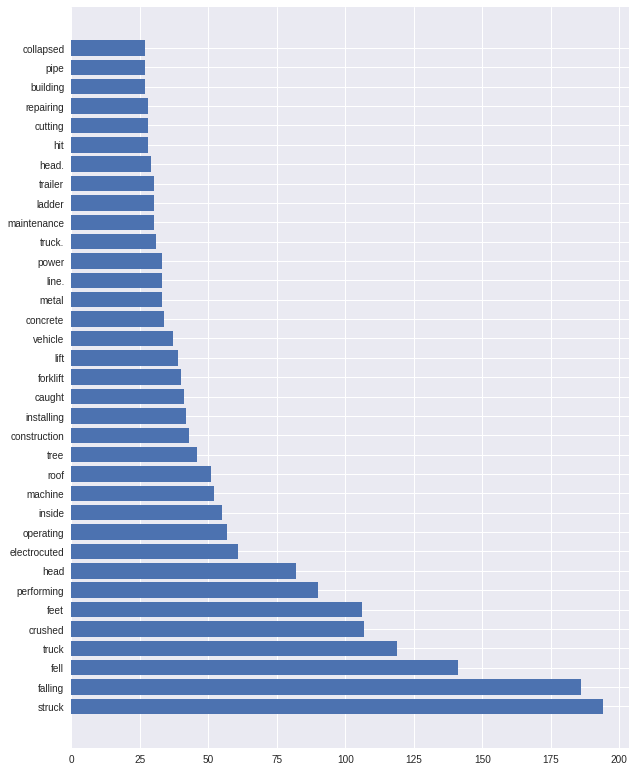

In [ ]:
d1=df_desc_unigrams[0][0:35]
d2=df_desc_unigrams[1][0:35]

plt.figure(1,figsize=(10,30))
plt.subplot(2,1,1)
_=plt.barh(d1,d2)



In [ ]:
df_bigrams =defaultdict(int)

for text in df.Desc12:
  for word in generate_ngrams(text,n_gram=2):
    df_bigrams[word]+=1

df_desc_bigrams= pd.DataFrame(
    sorted(df_bigrams.items(), key= lambda x:x[1])[::-1]
)



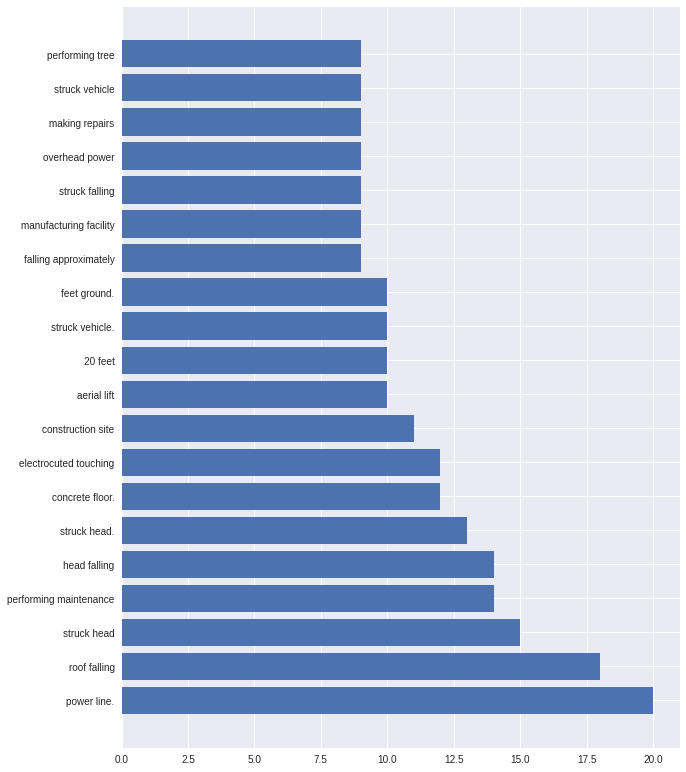

In [ ]:
d1=df_desc_bigrams[0][0:20]
d2=df_desc_bigrams[1][0:20]

plt.figure(1,figsize=(10,30))
plt.subplot(2,1,1)
_=plt.barh(d1,d2)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_text_ngrams(corpus, ngrams=(1,1), nr=None):
  vec = CountVectorizer(ngram_range=ngrams).fit(corpus)
  bag_of_words=vec.transform(corpus)
  sum_words= bag_of_words.sum(axis=0)
  words_freq=[(word,sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
  words_freq=sorted(words_freq, key= lambda x: x[1], reverse=True)
  return words_freq[:nr]





In [ ]:
top_text_bigrams = get_top_text_ngrams(df.Desc09, ngrams=(2,2),nr=20)

In [ ]:
top_text_bigrams

[('victim was', 79),
 ('worker was', 73),
 ('the worker', 40),
 ('and was', 34),
 ('and fell', 33),
 ('on the', 33),
 ('to the', 32),
 ('he was', 27),
 ('was working', 25),
 ('of the', 23),
 ('in the', 22),
 ('was struck', 21),
 ('was electrocuted', 18),
 ('struck by', 17),
 ('the ground', 16),
 ('employee was', 16),
 ('and the', 15),
 ('from the', 14),
 ('feet to', 13),
 ('the victim', 13)]

<BarContainer object of 20 artists>

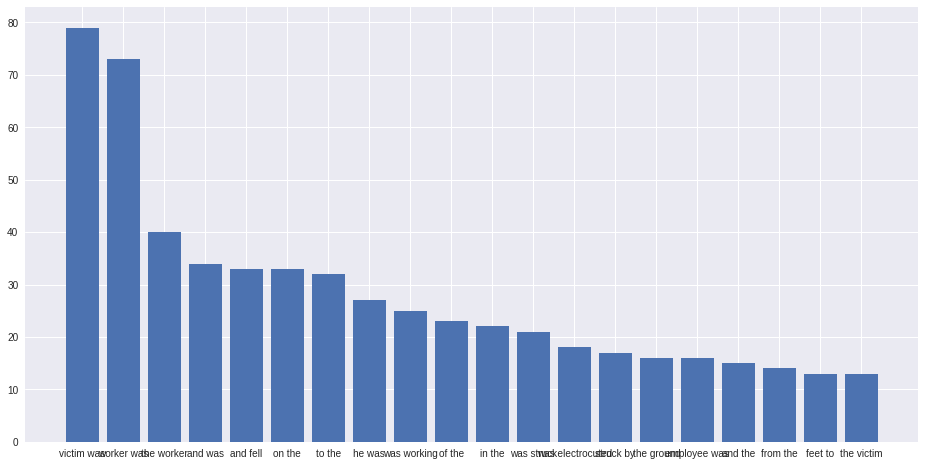

In [ ]:
x,y =zip(*top_text_bigrams)
plt.figure(1,figsize=(16, 8))
plt.subplot(1,1,1)
plt.bar(x,y)